#**Blackbody characteristics and fate of a star Python Project**


**Group members:**
1. Akbar Ahmed Chowdhury, 2030248
2. Naima Alam Zikra, 2130570
3. Nafiz Imtiaz, 2130544


**Course Code:** PHY432-1

**Course Name:** Introduction to Astrophysics

**Semester:** Spring 2022

**Instructor:** Dr. Khan Asad

---

# **Project Description**

We have chosen the topic "Characteristic of Radiation" from chapter 6 (Black Body Radiation) section 6.2. We wanted to examine if a star shows a blackbody curve and predict the fate of the star after its death: White Dwarf, Neutron Star, or Blackhole.

For that we have used the data from FIRAS CMB monopole spectrum and assumed the universe to be a star named as **StarU** as the data is literally of the background radiation of the universe itself. We had to assume that as we couldn't find intensity and frequency spectrum data of any star. We have used the data plot the Intensity vs Frequency curve for StarU and see if it resembles the Blackbody graph.

Next we have calculated the peak frequency and peak wavelength to see if they match with the peak in the plotted graph of StarU.

To predict the fate of the star we have calculated the Luminosity using the equation 6.20 of the book. The purpose of find the Luminosity is to find the Mass of the StarU using Luminosity-Mass relation. Lastly, we have taken advantage of the **Chandrasekhar Limit** to predict if the selected star will become a white dwarf, neutron star or blackhole after its death.

                                                   **Code starts from below**
---


In [ ]:
#Packages

import numpy as np
from numpy import sin, cos, tan, arctan as atan, pi, degrees as deg, radians as rad, sqrt
import matplotlib.pyplot as plt
import astropy.constants as ac
from scipy.constants import h, k, c
from numpy import e, linspace
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)



**Equation used to plot the blackbody curve of Intensity vs Frequency graph:**


$$I(ν,T)=\frac{2hν^3}{c^2e^{hv/kT}-1}$$
---



*   $ν$ is the Frequency
*   $T$ is the Temperature, which is taken to be $2.7$ K.
*   $h$ is the Planck's constant
*   $c$ is the speed of light
*   $k$ is the Boltzman constant


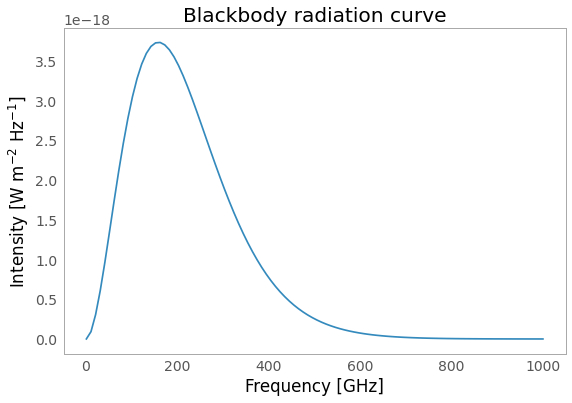

In [ ]:
#Blackbody curve of Intensity vs Frequency


I = lambda nu, T: 2*h*nu**3/c**2 * (1./(e**((h*nu)/(k*T))-1))      #Defining the function

plt.rcParams.update({'font.size': 14, 'figure.figsize':(9,6)})

nu = linspace(1,1e3,100)*1e9          #nu is in Hertz (Hz)
plt.plot(nu/1e9, I(nu,2.7), '-')      #2.7K is the temperature of the universe

plt.title("Blackbody radiation curve")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Intensity [W m$^{-2}$ Hz$^{-1}$]')
plt.grid()


/content


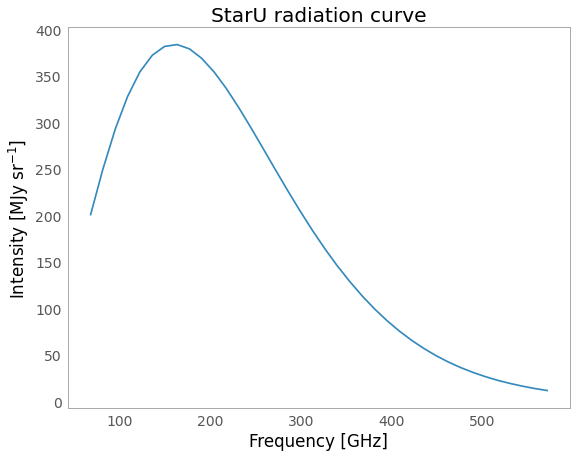

In [ ]:
#Intensity vs frequency graph based on the data found

%cd /content
import numpy as np, astropy as ap

f = open('data.txt')
l = f.readlines()
d = np.array([i.strip().split() for i in l[18:56]]).astype('float')
d.shape

nu_c = d[:,0]*1e2*c
I_c = (d[:,1])

plt.rcParams.update({'font.size': 14, 'figure.figsize':(9,7)})

f = nu_c/1e9

plt.title("StarU radiation curve")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Intensity [MJy sr$^{-1}$]')

plt.plot(f, I_c)

plt.grid()


**To find the peak frequency we have used the following equation:**

$$ν_{peak}=\frac{2.82kT}{T}$$
---
**To find the peak wavelength we have used the following equation:**

$$λ_{peak}=\frac{2.898}{T}$$
---

In [ ]:
#Peak frequency

nu_p = lambda T: (2.82*(k*T))/h     #nu_p is the peak frequency

nu_p = nu_p(2.7)/1e9       #2.7k is the temperature of the universe

print("Peak frequency, nu_p =", nu_p, "GHz")

#Peak wavelength

ld_p = lambda T: (2.898*1e-3)/T     #ld_p is the peak wavelength

ld_p = ld_p(2.7)/1e3

print("Peak Wavelength, ld_p =", ld_p, "mm")


Peak frequency, nu_p = 158.65001800501614 GHz
Peak Wavelength, ld_p = 1.0733333333333336e-06 mm


We can see that the peak frequency, $ν_{peak}$ in the graph **StarU radiaton curve** is approximately the same as the $ν_{peak}$ (158.65 GHz) calculated above.

---

We have used the following equation to find the **luminosity** of the Star:

$$L=4πR^2σT^4$$
---



*   $L$ is the luminosity of the star
*   $R$ is the radius


To find the constant sigma, $σ$, we have used the equation:
$$σ=\frac{2π^5k^4}{15c^2h^3}$$
---

In [ ]:
#Luminosity

R = 2.20*10**26   #Radius in m
s = (2*pi**(5)*k**4)/(15*c**(2)*h**3)    #s is the sigma

L = lambda R,T: 4*pi*R**(2)*s*T**4      #Defining the function for Luminosity

L_0 = L(R,2.7)              #L_0 is the Luminosity of the star
print("Luminosity = ", L_0, "W")


Luminosity =  1.8328292999149417e+48 W


To find the mass of the star we have used the luminosity-mass relation. Since the data is taken from the FIRAS CMB monopole spectrum, we have assumed the mass of the star to be the mass of the universe. That has to fall under the last condition $M>55M\odot$. So, we have used the following equation:

$$\frac{L}{L⊙}=32000\frac{M}{M⊙}$$
---


*   $L⊙$ is the solar luminosity
*   $M$ is the mass of the star
*   $M⊙$ is the solar mass

---
**Some of the data needed for calculations below**

* Mass of the sun = $1.989×10^{30}$ kg
* Radius of the sun = $6.96×10^5$ km
* Temperature of the sun = $5778$ K
* Luminosity of the sun = $3.828×10^{26}$ W
* Mass of universe = $4×10^{54}$ kg
* Radius of the universe= $2.20×10^{26}$ m



In [ ]:
#From the relationship between luminosity and mass, we get an equation
#For M> 55 solar mass, we use the relation: L_0/Ls = 32000*(M0/Ms)


Ms = 1.989*10**30    #Ms is the mass of the sun in kg
Ls = 3.828*10**26    #Ls is the luminosity of the sun in W
M = lambda Ms,L_0,Ls: Ms*(L_0*Ms/(32000*Ls))   #Defining the function for mass of the star

M0 = M(Ms,L_0,Ls)   #M0 is the mass of the star in kg

print("Mass of the star, M0 = ", M0, "kg")

Mass of the star, M0 =  5.919290819952326e+77 kg


Nw we will use **Chandrasekhar Limit** to predict the aftermath of the star's death. We know that chandrasekhar limit is:

$$M_{ch}→1.46M⊙$$
---
We know if the mass of any star is less than the Chandrasekhar limit ($M_{ch}$), then the star will become a **White Dwarf** like our sun will be.

If the mass of a star is more than $2M⊙$ and the radius is less than $2.95$ km, then the star will collapse into a **Blackhole**. If the radius is more than $2.95$ km and mass is more than the $M_{ch}$ then the star will become a **Neutron Star**.

In [ ]:
#Solar mass = M_sl
#We know, M_ch -> 1.46 M_sl


M_sl = (M0)/(Ms)   #equation to convert mass into solar mass
print("Mass of M0 in solar mass = ", M_sl)

#introducing if statements

if M_sl <= 1.46:
  print("This star will become a White Dwarf.")

if M_sl > 1.46 and R < 2.95:
    print("This star will become a Blackhole.")
if M_sl > 1.46 and R > 2.95:
      print("This star will become a Neutron Star.")


Mass of M0 in solar mass =  2.9760134841389266e+47
This star will become a Neutron Star.


The conculsion based on our code is that StarU will become a Neutron Star after its death. This conclusion is reached based on the data we have used from FIRAS CMB monopole spectrum data.